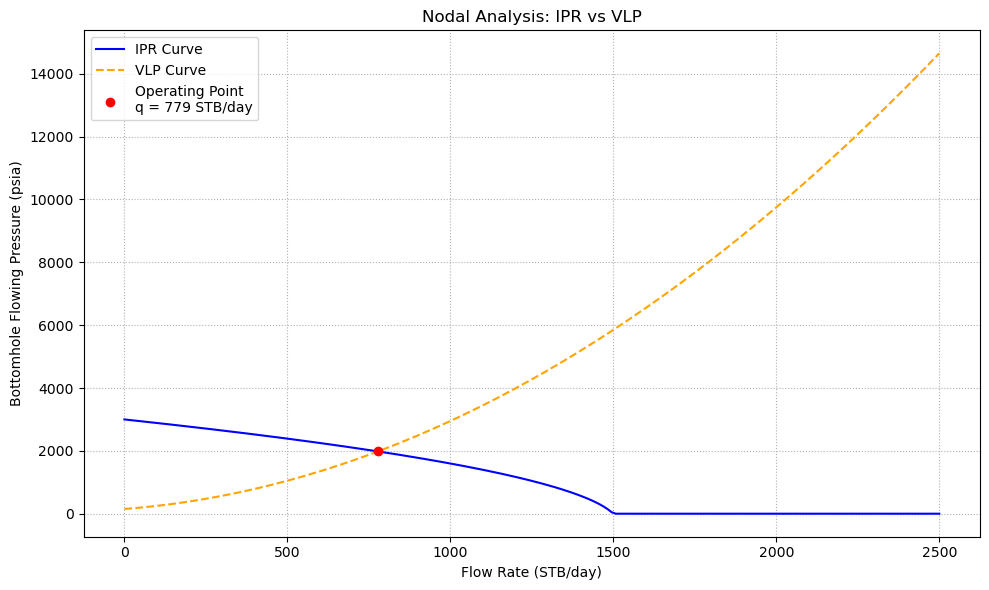

🔧 Operating Point → q = 778.89 STB/day, Pwf = 1980.60 psia


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


pr = 3000.0
qmax = 1500.0     
psurf = 50.0      
a, b, c = 0.002, 0.8, 100.0

def vogel_ipr(pr, qmax, pwf):
    x = pwf / pr
    return qmax * (1 - 0.2*x - 0.8*x**2)


def vlp(q, psurf, a, b, c):
    return psurf + a*q**2 + b*q + c

q_grid = np.linspace(0, 2500, 200)
pwf_samples = np.linspace(0, pr, 200)
q_ipr = vogel_ipr(pr, qmax, pwf_samples)
pwf_ipr = np.interp(q_grid, q_ipr[::-1], pwf_samples[::-1])
pwf_vlp = vlp(q_grid, psurf, a, b, c)


diff = abs(pwf_ipr - pwf_vlp)
idx = diff.argmin()
q_op, pwf_op = q_grid[idx], pwf_ipr[idx]


plt.figure(figsize=(10, 6))
plt.plot(q_grid, pwf_ipr, label='IPR Curve', color='blue')
plt.plot(q_grid, pwf_vlp, label='VLP Curve', color='orange', linestyle='--')
plt.scatter(q_op, pwf_op, color='red', label=f'Operating Point\nq = {q_op:.0f} STB/day', zorder=5)
plt.xlabel('Flow Rate (STB/day)')
plt.ylabel('Bottomhole Flowing Pressure (psia)')
plt.title('Nodal Analysis: IPR vs VLP')
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

print(f"🔧 Operating Point → q = {q_op:.2f} STB/day, Pwf = {pwf_op:.2f} psia")
